# Ejemplo de recuperación de películas de explicación

En este notebook se muestra un ejemplo completo de la extración de un conjunto de películas de explicación. En este ejemplo se aplica el dataset de movielens.

In [1]:
import random
import pandas as pd
import numpy as np

import src.similarities as sim
import src.latent_factor_xai as lfxai

from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import euclidean, cosine, cityblock

# Ponemos una semilla fija para poder repetir el experimento
my_seed = 0
random.seed(my_seed)
np.random.seed(my_seed)

import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
def train_test_split(dataDF, training_percentage):
    '''
    Función que divide el dataset en un conjunto de entrenamiento y
    otro conjunto de evaluación.
    '''
    msk = np.random.rand(len(dataDF)) < float(training_percentage / 100)
    train = dataDF[msk]
    test = dataDF[~msk]
    
    return train, test

In [3]:
# Cargamos todos los ratings del experimento
movies_DF = pd.read_csv('data/experiment_data/movies.csv')
ratings_DF = pd.read_csv('data/experiment_data/ratings.csv', usecols=[0,1,2])
ratings_DF.head()

,userId,movieId,rating
0,1,1,4.0
1,1,47,5.0
2,1,50,5.0
3,1,70,3.0
4,1,101,5.0


In [4]:
# Calculamos el porcentaje de la matriz completado

num_users = len(ratings_DF.groupby('userId').count().index)
num_items = len(ratings_DF.groupby('movieId').count().index)
total_ratings = len(ratings_DF)
total_values_to_predict = num_users * num_items

print(100*(total_ratings / total_values_to_predict), '% ratings conocidos del total de la matriz')

11.92192628910957 % ratings conocidos del total de la matriz


In [5]:
# Preparamos el dataset de entrenamiento y evaluación
trainset, testset = train_test_split(ratings_DF, 90)

# Guardamos ambos dataframes en CSV
trainset.to_csv('data/experiment_data/trainset.csv', index=False)
testset.to_csv('data/experiment_data/testset.csv', index=False)

## Creación del modelo de predición conexplicaciones

1. Creamos una instancia del modelo `NMF_XAI` que se encuentra en el módulo `latent_factor_xai`.
2. Entrenamos el modelo con el conjunto de datos de entrenamiento
3. A partir de un id de usuario y un id de película, obtenemos una predicción del rating (en el ejemplo, el usuario 12 y la película 14).
4. Extraemos el conjunto de ejemplos de explicación para la pareja usuario-película. (Si existen menos películas de ejemplo que las solicitadas, se devolverán todas las existentes)

In [6]:
model = lfxai.NMF_XAI()

# Entrenamos el model
model.fit(trainset, movies_DF)

# Predecimos un rating
model.predict(user_id=12, movie_id=14)

# Obtenemos los ejemplos de explicación
examples = model.get_examples(user_id=12, movie_id=14, n=10)

# Generar el retículo para explicaciones
context = model.get_lattice(movie_recommended=14, examples=examples)

# FALTA -> Definir qué explicaciones se muestran

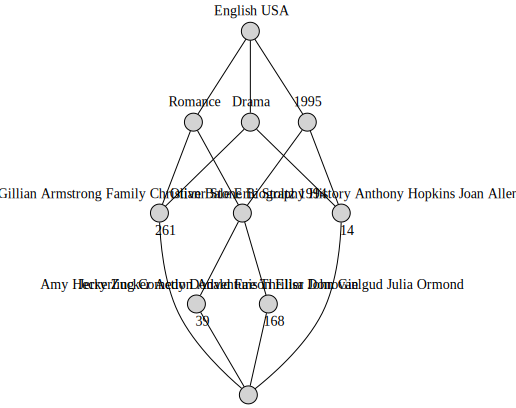

In [7]:
context.lattice.graphviz()